In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import pandas as pd
sys.path.insert(0, '../src')
import utils

# Results from other Text Analyzers

## Computer Science

### Jstor

This search engine has its own text analyzer. It requires human labor to label quality scores.

In [3]:
# score
jstor_cs_phrases = {"Psychotherapy": 0.99,
"Machine learning": 0.1,
"Text analytics": 0.95,
"Health care quality": 0.55,
"Academic aptitude": 0.3,
"Art therapy": 0.66,
"Big data": 0.5,
"Biomedical data": 0.55,
"Computer centers": 0.5,
"Audio engineering": 0.9,
"Code pages": 0.1,
"Compensatory education": 0.2,
"Computer programming": 0.9,
"Data analysis": 0.65,
"Data collection": 0.7,
"Educational technology": 0.3,
"Data transcription": 0.65,
"Data models": 0.8,
"Government information": 0.3,
"Health care utilization": 0.5,
"In state students": 0.1,
"Information attributes": 0.4,
"Learning": 0.1,
"Learning by doing": 0.1,
"Logistic regression": 0.7,
"Learning strategies": 0.1,
"Out of state students": 0.25,
"Psychological research": 0.95,
"Public health": 0.75,
"Speech acts": 0.7,
"School counseling": 0.6,
"Second language learning": 0.15,
"Student interests": 0.2,
"Students": 0.3,
"Time series": 0.75,
"Test theory": 0.6,
"Small area data": 0.6,
"Surveillance": 0.9,
"Time series forecasting": 0.8,
"ZIP codes": 0.2}

In [4]:
jstor_cs_labels = [1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0]

### AutoPhrase

In [54]:
dirs = os.listdir('../references/experiment data')
#dirs.remove('.DS_Store')
dirs

['Mathematics',
 'Statistics',
 'Quantitative Finance',
 'Economics',
 'Physics',
 'Quantitative Biology',
 'Computer Science',
 'Electrical Engineering and Systems Science']

In [55]:
weighted = {}
weighted_all = {}
weighted_stats = pd.DataFrame()
for directory in dirs:
    fp = '../references/experiment data/' + directory + '/weighted_AutoPhrase.csv'
    df = pd.read_csv(fp, index_col='Unnamed: 0')
    weighted_all[directory] = df
    weighted[directory] = df
    weighted_stats[directory] = df['score'].describe()
weighted_df = pd.concat(weighted, axis=1)
weighted_df.head(15)

Mathematics                  Statistics            \
                    phrase     score            phrase     score   
0              state space  0.907407          post hoc  0.563277   
1            initial state  0.876937              chen  0.511308   
2          policy gradient  0.825594                uk  0.490869   
3             lower bounds  0.820748               lim  0.472009   
4             upper bounds  0.760767          appendix  0.459412   
5              upper bound  0.743966           section  0.450614   
6               holds true  0.740892                ar  0.448357   
7              lower bound  0.740883                pr  0.438766   
8      policy optimization  0.739476               law  0.432914   
9           crossing times  0.588507  asymptotic power  0.432416   
10  entropy regularization  0.519889         separable  0.428614   
11    arxiv preprint arxiv  0.517943          gaussian  0.428142   
12              hypothesis  0.513784                h2  0.425777   
13                 optimal  0.498468            wilson  0.423929   
14                    long  0.497295                ii  0.423105   

       Quantitative Finance                          Economics            \
                     phrase     score                   phrase     score   
0           price formation  0.492314       affirmative action  0.854857   
1   stochastic differential  0.482875            school choice  0.765075   
2                      game  0.447040  incentive compatibility  0.723872   
3                stochastic  0.434419                 american  0.513310   
4                   control  0.418807                  college  0.500523   
5           market clearing  0.412391                  journal  0.485510   
6                     games  0.412282             choice rules  0.476397   
7             price process  0.408539                    chile  0.437769   
8          mean field games  0.408051                   review  0.429024   
9                 financial  0.402997                 backward  0.419779   
10             optimization  0.400598                       iv  0.419383   
11              probability  0.390429                   public  0.418359   
12                       ce  0.381366                  section  0.403542   
13                      mfg  0.377562                    india  0.399252   
14                       hg  0.372684                 economic  0.393846   

                Physics           Quantitative Biology            \
                 phrase     score               phrase     score   
0   gravitational field  0.892916       finite element  0.857318   
1    general relativity  0.883619         steady state  0.766612   
2     quantum mechanics  0.875915         quasi static  0.661856   
3         wave function  0.861265         brain tissue  0.571348   
4        quantum theory  0.849949              journal  0.502073   
5   gravitational waves  0.725033             fracture  0.482645   
6            yang mills  0.710754          engineering  0.477469   
7          field theory  0.660215                   dw  0.475907   
8              universe  0.586595   energy dissipation  0.472119   
9           gravitation  0.582881              cutting  0.462925   
10                  ref  0.580637              physics  0.459031   
11              feynman  0.576718                 soft  0.441014   
12             einstein  0.574153            mechanics  0.440835   
13           relativity  0.566364                brain  0.428432   
14           conference  0.565429          dissipation  0.425072   

                Computer Science            \
                          phrase     score   
0                  mental health  0.917283   
1   automatic speech recognition  0.876298   
2                substance abuse  0.871875   
3               machine learning  0.833653   
4             speech recognition  0.684244   
5                     real world  0.549731   
6                utterance level  0.5024

In [7]:
autophrase_cs_df = weighted_df['Computer Science'].dropna().head(100)
autophrase_cs_df

,phrase,score
0,mental health,0.917283
1,automatic speech recognition,0.876298
2,substance abuse,0.871875
3,machine learning,0.833653
4,speech recognition,0.684244
...,...,...
95,manual,0.394415
96,combined,0.393530
97,linguistic,0.392364
98,scale,0.391431


In [8]:
autophrase_cs_labels = [1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 
                       0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
                       0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
                       0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
                       0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
                       0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### Webtools: https://www.webtools.services/text-analyzer

This website tool helps us find the frequency of phrases in a document. We then standardize it to form scores in range of 0 to 1.

In [9]:
webtools_cs_phrases = {"of the": 74,
"et al": 45,
"to the": 36,
"in the": 28,
"for the": 27,
"in order": 15,
"the therapist": 15,
"and the": 15,
"in order to": 14,
"the system": 14,
"by the": 13,
"it is": 12,
"of a": 12,
"the session": 12,
"at the": 12,
"from the": 12,
"of psychotherapy": 11,
"able to": 11,
"with the": 10,
"we have": 10,
"we are": 10,
"is not": 10,
"the two": 10,
"between the": 10,
"university of": 9,
"in a": 9,
"has been": 9,
"behavioral coding": 9,
"of the system": 9,
"speech and": 8,
"more than": 8,
"is a": 8,
"as a": 8,
"a variety of": 8,
"in this": 8,
"based on": 8,
"the client": 8,
"to be": 8,
"using the": 8,
"automated evaluation": 7}

In [10]:
# standardize it
webtools_cs_phrases = utils.min_max_scale(webtools_cs_phrases)
webtools_cs_phrases

{'of the': 1.0,
 'et al': 0.5671641791044776,
 'to the': 0.43283582089552236,
 'in the': 0.31343283582089554,
 'for the': 0.29850746268656714,
 'in order': 0.11940298507462686,
 'the therapist': 0.11940298507462686,
 'and the': 0.11940298507462686,
 'in order to': 0.1044776119402985,
 'the system': 0.1044776119402985,
 'by the': 0.08955223880597014,
 'it is': 0.07462686567164178,
 'of a': 0.07462686567164178,
 'the session': 0.07462686567164178,
 'at the': 0.07462686567164178,
 'from the': 0.07462686567164178,
 'of psychotherapy': 0.05970149253731343,
 'able to': 0.05970149253731343,
 'with the': 0.04477611940298507,
 'we have': 0.04477611940298507,
 'we are': 0.04477611940298507,
 'is not': 0.04477611940298507,
 'the two': 0.04477611940298507,
 'between the': 0.04477611940298507,
 'university of': 0.029850746268656716,
 'in a': 0.029850746268656716,
 'has been': 0.029850746268656716,
 'behavioral coding': 0.029850746268656716,
 'of the system': 0.029850746268656716,
 'speech and': 0.0

In [11]:
webtools_cs_labels = [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
len(webtools_cs_labels) == len(webtools_cs_phrases)

True

### MonkeyLearn: https://monkeylearn.com/text-analyzer/

This text analyzer extracts keywords from the document. It requires human labor to label quality scores.

In [12]:
monkeylearn_cs_phrases = {"sessions": 0.45,
"codes": 0.1,
"utterances": 0.5,
"behavioral coding": 0.7,
"therapist": 0.65,
"international speech communication": 0.3,
"Automatic Speech Recognition": 0.9,
"speech communication association": 0.8,
"Proc": 0.1,
"psychotherapy": 0.95}

In [13]:
monkeylearn_cs_labels = [1, 0, 0, 1, 1, 1, 1, 1, 0, 1]

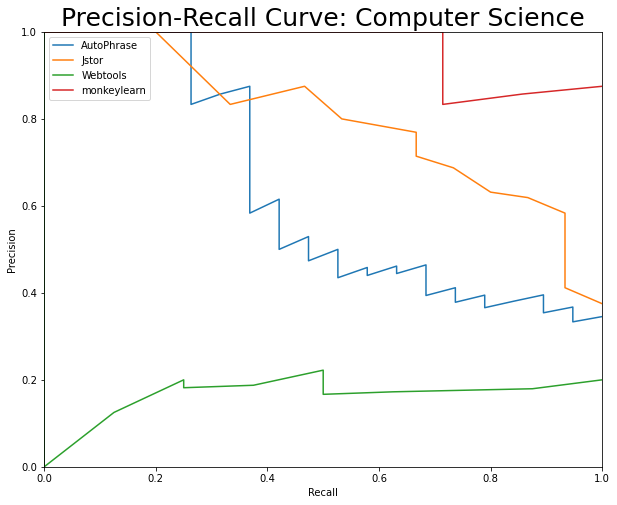

In [14]:
utils.graph_precision_recall(autophrase_cs_labels, autophrase_cs_df,
    jstor_cs_labels, jstor_cs_phrases, 
    webtools_cs_labels, webtools_cs_phrases,
    monkeylearn_cs_labels, monkeylearn_cs_phrases, "Computer Science")

## Economics

### AutoPhrase

In [15]:
autophrase_econ_df = weighted_df['Economics'].dropna().head(100)
autophrase_econ_df

,phrase,score
0,affirmative action,0.854857
1,school choice,0.765075
2,incentive compatibility,0.723872
3,american,0.513310
4,college,0.500523
...,...,...
95,assumption,0.249116
96,presented,0.248769
97,result,0.247104
98,min,0.244549


In [25]:
autophrase_econ_df.iloc[90:100]

,phrase,score
90,adjustment,0.254914
91,main,0.251804
92,highest,0.251309
93,rejected,0.249816
94,accommodates,0.249589
95,assumption,0.249116
96,presented,0.248769
97,result,0.247104
98,min,0.244549
99,present,0.243910


In [26]:
autophrase_econ_labels = [1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 
                         0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 
                         0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
                         0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
                         0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 
                         1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
                         0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 
                         0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 
                         0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
                         0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

### Jstor

### Webtools

### MonkenLearn

## Electrical Engineering and Systems Science

### AutoPhrase

In [27]:
autophrase_eess_df = weighted_df['Electrical Engineering and Systems Science'].dropna().head(100)
autophrase_eess_df

,phrase,score
0,magnetic resonance,0.892167
1,deep learning,0.828240
2,fine tuning,0.696476
3,multi coil,0.695884
4,cine mri,0.692821
...,...,...
95,general,0.313608
96,domain,0.311901
97,encoding,0.310908
98,materials and methods,0.309510


In [37]:
autophrase_eess_df.iloc[90:100]

,phrase,score
90,architecture,0.324693
91,output,0.321052
92,order,0.317956
93,methods,0.317363
94,complexity,0.315892
95,general,0.313608
96,domain,0.311901
97,encoding,0.310908
98,materials and methods,0.309510
99,stage,0.304456


In [38]:
autophrase_eess_labels = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                         1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
                         1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
                         0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
                         0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
                         0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
                         1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
                         1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 
                         0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### Jstor

### Webtools

### MonkeyLearn

## Mathematics

### AutoPhrase

In [40]:
autophrase_math_df = weighted_df['Mathematics'].dropna().head(100)
autophrase_math_df

,phrase,score
0,state space,0.907407
1,initial state,0.876937
2,policy gradient,0.825594
3,lower bounds,0.820748
4,upper bounds,0.760767
...,...,...
95,theorem,0.381741
96,actions,0.380851
97,distribution,0.379415
98,appendix,0.379024


In [50]:
autophrase_math_df.iloc[90:100]

,phrase,score
90,pg,0.384995
91,mdp,0.384347
92,line,0.383398
93,observation,0.382639
94,decreasing,0.382006
95,theorem,0.381741
96,actions,0.380851
97,distribution,0.379415
98,appendix,0.379024
99,bound,0.378941


In [51]:
autophrase_math_labels = [1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
                         1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
                         1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 
                         1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
                         1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 
                         0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
                         1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
                         0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
                         1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
                         0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

### Jstor

### Webtools

### MonkeyLearn

## Physics

### AutoPhrase

In [58]:
autophrase_physics_df = weighted_df['Physics'].dropna().head(100)
autophrase_physics_df

,phrase,score
0,gravitational field,0.892916
1,general relativity,0.883619
2,quantum mechanics,0.875915
3,wave function,0.861265
4,quantum theory,0.849949
...,...,...
95,s,0.324515
96,original,0.316272
97,given,0.316090
98,years,0.315955


In [68]:
autophrase_physics_df.iloc[90:100]

,phrase,score
90,first,0.334150
91,case,0.329926
92,diagrams,0.327918
93,solutions,0.326684
94,treatment,0.324879
95,s,0.324515
96,original,0.316272
97,given,0.316090
98,years,0.315955
99,approach,0.311892


In [69]:
autophrase_physics_labels = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                            0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 
                            1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 
                            1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 
                            0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
                            0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
                            0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
                            1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 
                            0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 
                            0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

### Jstor

### Webtools

### MonkeyLearn

## Quantitative Biology

### AutoPhrase

In [70]:
autophrase_qbio_df = weighted_df['Quantitative Biology'].dropna().head(100)
autophrase_qbio_df

,phrase,score
0,finite element,0.857318
1,steady state,0.766612
2,quasi static,0.661856
3,brain tissue,0.571348
4,journal,0.502073
...,...,...
95,in,0.217941
96,the,0.217227
97,at,0.202114
98,m,0.200139


In [80]:
autophrase_qbio_df.iloc[90:100]

,phrase,score
90,fluid,0.239163
91,behaviour,0.235715
92,considered,0.222092
93,employed,0.219561
94,shown,0.218922
95,in,0.217941
96,the,0.217227
97,at,0.202114
98,m,0.200139
99,o,0.192101


In [81]:
autophrase_qbio_labels = [1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
                         1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
                         1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
                         0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
                         0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
                         0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 
                         0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
                         1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
                         0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
                         1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### Jstor

### Webtools

### MonkeyLearn

## Quantitative Finance

In [82]:
autophrase_qfin_df = weighted_df['Quantitative Finance'].dropna().head(100)
autophrase_qfin_df

,phrase,score
0,price formation,0.492314
1,stochastic differential,0.482875
2,game,0.447040
3,stochastic,0.434419
4,control,0.418807
...,...,...
95,h,0.157861
96,following,0.154500
97,l,0.152696
98,r,0.151700


In [93]:
autophrase_qfin_df.iloc[90:100]

,phrase,score
90,dt +,0.178704
91,v,0.174098
92,d,0.161379
93,mean,0.160026
94,system,0.158671
95,h,0.157861
96,following,0.154500
97,l,0.152696
98,r,0.151700
99,g,0.150717


In [94]:
autophrase_qbio_labels = [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 
                         1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
                         0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
                         0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 
                         0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
                         1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
                         1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 
                         0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
                         1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### Jstor

### Webtools

### MonkeyLearn

## Statistics

### AutoPhrase

In [95]:
autophrase_stat_df = weighted_df['Statistics'].dropna().head(100)
autophrase_stat_df

,phrase,score
0,post hoc,0.563277
1,chen,0.511308
2,uk,0.490869
3,lim,0.472009
4,appendix,0.459412
...,...,...
96,et.al,0.300920
97,choice,0.300448
98,methods,0.300156
99,monotonicity,0.299887


In [105]:
autophrase_stat_df.iloc[90:100]

,phrase,score
91,largest,0.309492
92,elementary,0.307556
93,expression,0.307203
94,calibration,0.303951
95,independence,0.300934
96,et.al,0.300920
97,choice,0.300448
98,methods,0.300156
99,monotonicity,0.299887
100,fact,0.299401


In [107]:
autophrase_stat_labels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 
                         1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
                         0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
                         1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 
                         0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                         1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
                         1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
                         0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
                         1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
                         0, 1, 0, 1, 0, 0, 0, 0, 1, 0]

### Jstor

### Webtools

### MonkeyLearn